<a href="https://colab.research.google.com/github/prachi-lad17/Python-Case-Studies/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os

In [3]:
'''
1. Read and Analyse Dataset [ 7 Marks ]
A. Check if there are any missing values. Print the percentage of missing values in each column [1 Mark]
B. Check value counts of the Rating column [1 Mark]
C. Drop the users who have not rated any books and write a function to convert all the categorical review to numerical review ( it was amazing ->
5 really liked it -> 4 liked it -> 3 it was ok -> 2 did not like it ->1 ) [1 Mark]
D. Check the distribution of the Converted Rating Values [1 Mark]
E. Construct a Dataframe to view the percentage of review of each Author. [1 Mark]
F. Print the users who have rated most of the books & grab the Users who have rated more than 500 numbers of Books. [1 Mark]
G. Calculate the Density of the rating matrix [1 Mark]
'''

'\n1. Read and Analyse Dataset [ 7 Marks ]\nA. Check if there are any missing values. Print the percentage of missing values in each column [1 Mark]\nB. Check value counts of the Rating column [1 Mark]\nC. Drop the users who have not rated any books and write a function to convert all the categorical review to numerical review ( it was amazing ->\n5 really liked it -> 4 liked it -> 3 it was ok -> 2 did not like it ->1 ) [1 Mark]\nD. Check the distribution of the Converted Rating Values [1 Mark]\nE. Construct a Dataframe to view the percentage of review of each Author. [1 Mark]\nF. Print the users who have rated most of the books & grab the Users who have rated more than 500 numbers of Books. [1 Mark]\nG. Calculate the Density of the rating matrix [1 Mark]\n'

In [4]:
## 1. Read and Analyse Dataset [ 7 Marks ]

In [5]:
review_df=pd.read_csv('Book_Ratings.csv',encoding='latin1')

In [6]:
review_df.shape

(51945, 4)

In [7]:
## A. Check if there are any missing values. Print the percentage of missing values in each column [1 Mark]

review_df.isnull().sum()

## as we can see there are no missing values.

ID         0
Name       0
Rating     0
Authors    0
dtype: int64

In [8]:
review_df.isna().sum()

## as we can see there are no missing values.

ID         0
Name       0
Rating     0
Authors    0
dtype: int64

In [9]:
## B. Check value counts of the Rating column [1 Mark]

review_df['Rating'].value_counts()


'''
1. In the given dataset 20282 people have rated for 'really liked it'
2. 14108n people have voted for 'it was amazing'
3. 13155 have rated for 'liked it'
4. 3349 have rated 'it was ok'
5. 748 readers did not like the book
6. 202 readers doesn't have any ratings.
'''

"\n1. In the given dataset 20282 people have rated for 'really liked it'\n2. 14108n people have voted for 'it was amazing'\n3. 13155 have rated for 'liked it'\n4. 3349 have rated 'it was ok'\n5. 748 readers did not like the book\n6. 202 readers doesn't have any ratings.\n"

In [10]:
## C. Drop the users who have not rated any books and write a function to convert all the categorical review to numerical review ( it was amazing ->

# review_df = review_df[review_df["Rating"] != "This user doesn't have any rating"]

review_df.drop(review_df[review_df['Rating'] == "This user doesn't have any rating"].index, inplace = True)

In [11]:
review_df.shape

(51642, 4)

In [12]:
51945-51642

303

The readers who haven't rated anything have been removed.


In [13]:
review_df.head()

,ID,Name,Rating,Authors
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing,J.K. Rowling
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing,J.K. Rowling
2,1,Siddhartha,it was amazing,J.K. Rowling
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it,J.K. Rowling
4,1,"Ready Player One (Ready Player One, #1)",really liked it,J.K. Rowling


In [14]:
## write a function to convert all the categorical review to numerical review ( it was amazing ->5 really liked it -> 4 liked it -> 3 it was ok -> 2 did not like it ->1 ) 

'''
it was amazing ->5
really liked it -> 4
liked it -> 3
it was ok -> 2
did not like it ->1
'''

# replacing values

review_df['Rating'] = review_df['Rating'].replace(['it was amazing','really liked it','liked it','it was ok','did not like it'],[5,4,3,2,1])

review_df.head()

,ID,Name,Rating,Authors
0,1,Agile Web Development with Rails: A Pragmatic ...,5,J.K. Rowling
1,1,The Restaurant at the End of the Universe (Hit...,5,J.K. Rowling
2,1,Siddhartha,5,J.K. Rowling
3,1,The Clock of the Long Now: Time and Responsibi...,4,J.K. Rowling
4,1,"Ready Player One (Ready Player One, #1)",4,J.K. Rowling


In [15]:
## Let's convert ratings from numerical to str. According to my knowledge ratings should be ordinal categorical datatype

review_df['Rating'] = review_df['Rating'].astype("str")

The categories has been converted to numbers

<Axes: >

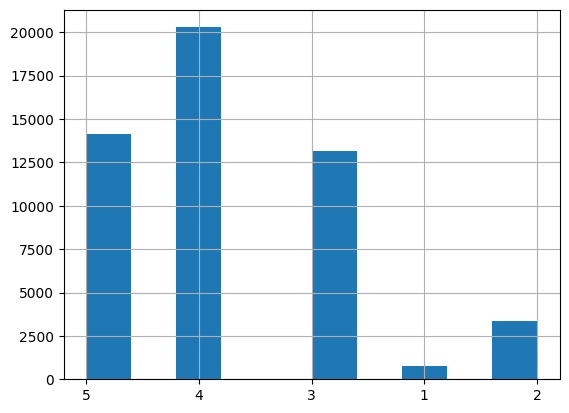

In [16]:
## D. Check the distribution of the Converted Rating Values [1 Mark]

review_df['Rating'].hist(bins=10)

1. Here we can see that books have ratings 4 are higher in number followed by 5,3,2 and then 1

In [17]:
review_df['Rating'] = review_df['Rating'].astype("int")

In [18]:
review_df['Rating'].unique()

array([5, 4, 3, 1, 2])

In [19]:
## E. Construct a Dataframe to view the percentage of review of each Author. [1 Mark]

In [20]:
len(review_df['Authors'].unique())

### There are 25253 number of authors mentions in this dataset 

25253

In [21]:
review_df['Authors'].value_counts()

William Shakespeare    115
Carolyn Keene          105
Isaac Asimov            97
Stephen King            91
Harold Bloom            91
                      ... 
Jean Darby               1
David Eisenhower         1
Jeff Young               1
Pascaline Winand         1
Kevin J. O'Brien         1
Name: Authors, Length: 25253, dtype: int64

In [22]:
s = review_df.groupby('Rating')['Authors'].size()

df = pd.concat([s, s / s.sum() * 100], axis=1, keys=('count','Percentage'))

df.loc['Total'] = df.sum().astype(int)

print (df)

## 39% = 4 
## 27% = 5
## 25% = 3
## 6% = 2
## 1% = 1



        count  Percentage
Rating                   
1         748    1.448433
2        3349    6.485032
3       13155   25.473452
4       20282   39.274234
5       14108   27.318849
Total   51642  100.000000


In [23]:
s = review_df.groupby('Authors')['Rating'].size().sort_values(ascending=False)

df = pd.concat([s, s / s.sum() * 100], axis=1, keys=('count','Percentage'))

df.loc['Total'] = df.sum().astype(int)

print (df[:10])

### Here author william shakespeare have contributed highest percentage of ratings in dataset i.e. 0.222687 %
### Carolyn keene = 0.203323 %
### Isaac Asimov = 0.187832 %
### Harold Bloom = 0.176213 %
### Stephen King = 0.176213 %

                     count  Percentage
Authors                               
William Shakespeare    115    0.222687
Carolyn Keene          105    0.203323
Isaac Asimov            97    0.187832
Anonymous               91    0.176213
Harold Bloom            91    0.176213
Stephen King            91    0.176213
J.R.R. Tolkien          85    0.164595
Rumiko Takahashi        82    0.158785
Piers Anthony           81    0.156849
C.S. Lewis              77    0.149103


In [24]:
## F. Print the users who have rated most of the books & grab the Users who have rated more than 500 numbers of Books. [1 Mark]

review_df['ID'].value_counts()[:10]

284    2052
675    1244
853    1082
913     999
166     995
338     993
882     938
529     890
926     758
5       703
Name: ID, dtype: int64

1. User ID 284 have rated highest number of books i.e. 2052

In [25]:
# prints filtered value_counts for the column

review_df['ID'].value_counts().loc[lambda x : x>=500] 

284    2052
675    1244
853    1082
913     999
166     995
338     993
882     938
529     890
926     758
5       703
503     690
751     674
327     668
192     656
319     624
696     618
347     617
768     603
667     588
705     575
329     568
250     537
384     534
897     504
Name: ID, dtype: int64

In [26]:
## G. Calculate the Density of the rating matrix [1 Mark]

#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = review_df.pivot(index = 'ID', columns ='Name', values = 'Rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (531, 24093)
given_num_of_ratings =  51642
possible_num_of_ratings =  12793383
density: 0.40%


Name,"""A Problem from Hell"": America and the Age of Genocide","""B"" Is for Betsy","""Headhunter"" Hiring Secrets: The Rules of the Hiring Game Have Changed . . . Forever!","""Master Harold""...and the boys","""Multiplication Is for White People"": Raising Expectations for Other People's Children","""Nosotros"". La juventud del Ateneo de MÃ©xico","""Pierrot Mon Ami"" De Raymond Queneau","""Surely You're Joking, Mr. Feynman!"": Adventures of a Curious Character","""The Sayings of Poor Richard"": The Prefaces, Proverbs, And Poems Of Benjamin Franklin, Originally Printed In Poor Richard's Almanacs For 1773 1758","""Why Are All The Black Kids Sitting Together in the Cafeteria?"": A Psychologist Explains the Development of Racial Identity",...,"ë¬ë¹ ì¡°ê°ì¬ 4 (The Legendary Moonlight Sculptor, #4)","ë¬ë¹ ì¡°ê°ì¬ 40 (The Legendary Moonlight Sculptor, #40)","ë¬ë¹ ì¡°ê°ì¬ 41 (The Legendary Moonlight Sculptor, #41)","ë¬ë¹ ì¡°ê°ì¬ 42 (The Legendary Moonlight Sculptor, #42)","ë¬ë¹ ì¡°ê°ì¬ 43 (The Legendary Moonlight Sculptor, #43)","ë¬ë¹ ì¡°ê°ì¬ 5 (The Legendary Moonlight Sculptor, #5)","ë¬ë¹ ì¡°ê°ì¬ 6 (The Legendary Moonlight Sculptor, #6)","ë¬ë¹ ì¡°ê°ì¬ 7 (The Legendary Moonlight Sculptor, #7)","ë¬ë¹ ì¡°ê°ì¬ 8 (The Legendary Moonlight Sculptor, #8)","ë¬ë¹ ì¡°ê°ì¬ 9 (The Legendary Moonlight Sculptor, #9)"
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. Build a popularity-based recommendation system [ 18 Marks]<br>
    A. Check count of user id for each unique book and save it as score [3 Marks]<br>
    B. Check count of user id for each unique author and save it as score. Sort the products based on the score (calculated above) [3 Marks]<br>
    C. Sort the Authors based on the score (calculated above) [ 3 Marks ]<br>
    D. Create a new column called 'Rank' having the ascending recommendation rank based upon score [3 Marks]<br>
    E. Get the top 10 Book recommendation based on their rank [3 Marks]<br>
    F. Get the top 10 Author recommendation based on their rank [3 Marks]

In [27]:
## A. Check count of user id for each unique book and save it as score [3 Marks]

review_df['Score1'] = review_df.groupby(['Name'])['ID'].transform('count')

review_df.head()

## e.g. Here as we can see "Siddhartha" book have 6 number of user ids associated with it.

,ID,Name,Rating,Authors,Score1
0,1,Agile Web Development with Rails: A Pragmatic ...,5,J.K. Rowling,6
1,1,The Restaurant at the End of the Universe (Hit...,5,J.K. Rowling,7
2,1,Siddhartha,5,J.K. Rowling,27
3,1,The Clock of the Long Now: Time and Responsibi...,4,J.K. Rowling,1
4,1,"Ready Player One (Ready Player One, #1)",4,J.K. Rowling,36


In [28]:
## B. Check count of user id for each unique author and save it as score. Sort the products based on the score (calculated above) [3 Marks]

review_df['Score2'] = review_df.groupby(['Authors'])['ID'].transform('count')

review_df.head()

## e.g. Here as we can see "J.K. Rowling" book have 58 number of user ids associated with it.

,ID,Name,Rating,Authors,Score1,Score2
0,1,Agile Web Development with Rails: A Pragmatic ...,5,J.K. Rowling,6,58
1,1,The Restaurant at the End of the Universe (Hit...,5,J.K. Rowling,7,58
2,1,Siddhartha,5,J.K. Rowling,27,58
3,1,The Clock of the Long Now: Time and Responsibi...,4,J.K. Rowling,1,58
4,1,"Ready Player One (Ready Player One, #1)",4,J.K. Rowling,36,58


In [29]:
##  Sort the products based on the score (calculated above) 

review_df.sort_values(by=['Score1'], ascending=False)

## As we can see there are multiple authors for one book. The Kite Runner is having 126 users 

,ID,Name,Rating,Authors,Score1,Score2
24986,437,The Kite Runner,5,Dorothy D. France,126,1
12088,251,The Kite Runner,4,Charles Todd,126,10
2342,26,The Kite Runner,5,Mark Forster,126,3
13087,276,The Kite Runner,5,John Lange,126,1
44417,871,The Kite Runner,4,C.S. Forester,126,26
...,...,...,...,...,...,...
38953,726,Getting Warmer,2,Donna J. Haraway,1,5
15934,284,You Belong To Me,3,David Allen Sibley,1,2
26616,481,Bury the Chains,4,Susannah M. Smith,1,1
5649,136,A Game of Proof (The Trials of Sarah Newby #1),2,Claire Masurel,1,3


In [30]:
## C. Sort the Authors based on the score (calculated above) [ 3 Marks ]

review_df.sort_values(by=['Score2'], ascending=False)

## Here 115 people have rated books which author is William Shakespeare which means William is the author who's having large number of user base who gave review.


,ID,Name,Rating,Authors,Score1,Score2
28119,503,Other People's Houses,3,William Shakespeare,2,115
47590,912,Law in the United States (American Casebook Se...,5,William Shakespeare,1,115
7881,171,"Midnight Tides (Malazan Book of the Fallen, #5)",5,William Shakespeare,2,115
28120,503,The Adults,3,William Shakespeare,1,115
28122,503,Artemis,3,William Shakespeare,10,115
...,...,...,...,...,...,...
27663,501,Sputnik Sweetheart,3,Paul Bagdon,7,1
27662,501,Taft,2,Frank Stringfellow Jr.,1,1
27660,501,Radio Free Albemuth,3,Martin Wasserman,2,1
27658,501,Do Androids Dream of Electric Sheep?,3,John Fante,3,1


In [31]:
# review_df['Rank1_book'] = review_df.sort_values(by=['Score1'], ascending=False)

review_df['Rank1_book'] = review_df['Score1'].rank(ascending = 0)

review_df.head()

,ID,Name,Rating,Authors,Score1,Score2,Rank1_book
0,1,Agile Web Development with Rails: A Pragmatic ...,5,J.K. Rowling,6,58,20201.5
1,1,The Restaurant at the End of the Universe (Hit...,5,J.K. Rowling,7,58,18925.0
2,1,Siddhartha,5,J.K. Rowling,27,58,8026.5
3,1,The Clock of the Long Now: Time and Responsibi...,4,J.K. Rowling,1,58,42617.0
4,1,"Ready Player One (Ready Player One, #1)",4,J.K. Rowling,36,58,5892.5


In [32]:
review_df['Rank1_book'] = review_df['Score1'].rank(ascending = 0)
review_df['Rank2_author'] = review_df['Score2'].rank(ascending = 0)


In [33]:
review_df.head()

,ID,Name,Rating,Authors,Score1,Score2,Rank1_book,Rank2_author
0,1,Agile Web Development with Rails: A Pragmatic ...,5,J.K. Rowling,6,58,20201.5,1663.5
1,1,The Restaurant at the End of the Universe (Hit...,5,J.K. Rowling,7,58,18925.0,1663.5
2,1,Siddhartha,5,J.K. Rowling,27,58,8026.5,1663.5
3,1,The Clock of the Long Now: Time and Responsibi...,4,J.K. Rowling,1,58,42617.0,1663.5
4,1,"Ready Player One (Ready Player One, #1)",4,J.K. Rowling,36,58,5892.5,1663.5


In [34]:
review_df.sort_values(by=['Rank1_book'], ascending=1)[:5]

,ID,Name,Rating,Authors,Score1,Score2,Rank1_book,Rank2_author
11489,248,The Kite Runner,4,Michael R. Molino,126,1,63.5,41969.5
10674,209,The Kite Runner,5,Neil Gaiman,126,37,63.5,3173.0
32819,609,The Kite Runner,4,Tracy Cabot,126,1,63.5,41969.5
32688,607,The Kite Runner,5,K.L. Hossner,126,1,63.5,41969.5
39785,751,The Kite Runner,4,Yoshiko Uchida,126,1,63.5,41969.5


In [35]:
review_df.sort_values(by=['Rank2_author'], ascending=1)[:5]

,ID,Name,Rating,Authors,Score1,Score2,Rank1_book,Rank2_author
7878,171,"The Lord of the Rings (The Lord of the Rings, ...",5,William Shakespeare,24,115,8903.5,58.0
33852,621,Thunderstruck,3,William Shakespeare,6,115,20201.5,58.0
19800,338,Redshirts,4,William Shakespeare,9,115,16809.5,58.0
19890,338,The Emerald City of Oz (Oz #6),4,William Shakespeare,3,115,26657.5,58.0
19920,338,"Gathering Blue (The Giver, #2)",3,William Shakespeare,4,115,23903.5,58.0


In [36]:
### E. Get the top 10 Book recommendation based on their rank [3 Marks]

review_df.sort_values(by=['Rank2_author'], ascending=1)[:10]  


,ID,Name,Rating,Authors,Score1,Score2,Rank1_book,Rank2_author
7878,171,"The Lord of the Rings (The Lord of the Rings, ...",5,William Shakespeare,24,115,8903.5,58.0
33852,621,Thunderstruck,3,William Shakespeare,6,115,20201.5,58.0
19800,338,Redshirts,4,William Shakespeare,9,115,16809.5,58.0
19890,338,The Emerald City of Oz (Oz #6),4,William Shakespeare,3,115,26657.5,58.0
19920,338,"Gathering Blue (The Giver, #2)",3,William Shakespeare,4,115,23903.5,58.0
19922,338,The Tree of Red Stars,5,William Shakespeare,1,115,42617.0,58.0
19924,338,The Maltese Falcon,3,William Shakespeare,7,115,18925.0,58.0
19926,338,Rollback,4,William Shakespeare,2,115,30907.5,58.0
49099,925,Los ejÃ©rcitos,3,William Shakespeare,1,115,42617.0,58.0
4209,73,"Ender's Game (Ender's Saga, #1)",4,William Shakespeare,69,115,2271.0,58.0


In [37]:
## F. Get the top 10 Author recommendation based on their rank [3 Marks]

review_df.sort_values(by=['Rank1_book'], ascending=1)[:10]

,ID,Name,Rating,Authors,Score1,Score2,Rank1_book,Rank2_author
11489,248,The Kite Runner,4,Michael R. Molino,126,1,63.5,41969.5
10674,209,The Kite Runner,5,Neil Gaiman,126,37,63.5,3173.0
32819,609,The Kite Runner,4,Tracy Cabot,126,1,63.5,41969.5
32688,607,The Kite Runner,5,K.L. Hossner,126,1,63.5,41969.5
39785,751,The Kite Runner,4,Yoshiko Uchida,126,1,63.5,41969.5
22554,369,The Kite Runner,5,Reginald Hill,126,15,63.5,9899.0
11106,217,The Kite Runner,5,Gordon Korman,126,27,63.5,5316.0
25580,443,The Kite Runner,5,Mitsuo Fuchida,126,1,63.5,41969.5
51559,977,The Kite Runner,5,CaitlÃ­n Matthews,126,26,63.5,5632.5
11210,230,The Kite Runner,3,Peter Watson,126,1,63.5,41969.5


3. Build a Collaborative-based recommendation system [ 15 Marks]<br>
    A. Drop the Author Column and Construct the pivot dataframe using the user_id and name of the book [3 Marks]<br>
    B. Create the User column and set it as index of the dataframe [3 Marks]<br>
    C. Perform Singular value decomposition on the above sparse matrix [ 3 Marks ]<br>
    D. Write a function that will take user_id, pivot_df & our SVD prediction dataframe and recommend the items according to the number of recommendation [3 Marks]<br>
    E. Calculate the RMSE value of original density matrix and prediction Matrix [3 Marks]

In [38]:
data = review_df

In [39]:
## A. Drop the Author Column and Construct the pivot dataframe using the user_id and name of the book [3 Marks]

data['value'] = 1

pivot_data = data.pivot(index = 'Name', columns = 'ID', values = 'value').fillna(0)

pivot_data

ID,1,2,3,4,5,6,7,8,9,12,...,976,977,981,982,987,989,991,993,998,999
Name,,,,,,,,,,,,,,,,,,,,,
"""A Problem from Hell"": America and the Age of Genocide",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""B"" Is for Betsy",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Headhunter"" Hiring Secrets: The Rules of the Hiring Game Have Changed . . . Forever!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Master Harold""...and the boys",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Multiplication Is for White People"": Raising Expectations for Other People's Children",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"ë¬ë¹ ì¡°ê°ì¬ 5 (The Legendary Moonlight Sculptor, #5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ë¬ë¹ ì¡°ê°ì¬ 6 (The Legendary Moonlight Sculptor, #6)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ë¬ë¹ ì¡°ê°ì¬ 7 (The Legendary Moonlight Sculptor, #7)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
## B. Create the User column and set it as index of the dataframe [3 Marks]

data['user'] = data['ID']

data = data.drop(['ID','value'],axis=1)

data = data.set_index('user')

data.head()

,Name,Rating,Authors,Score1,Score2,Rank1_book,Rank2_author
user,,,,,,,
1,Agile Web Development with Rails: A Pragmatic ...,5,J.K. Rowling,6,58,20201.5,1663.5
1,The Restaurant at the End of the Universe (Hit...,5,J.K. Rowling,7,58,18925.0,1663.5
1,Siddhartha,5,J.K. Rowling,27,58,8026.5,1663.5
1,The Clock of the Long Now: Time and Responsibi...,4,J.K. Rowling,1,58,42617.0,1663.5
1,"Ready Player One (Ready Player One, #1)",4,J.K. Rowling,36,58,5892.5,1663.5


In [41]:
## C. Perform Singular value decomposition on the above sparse matrix [ 3 Marks ]

## Reshaping data into sparx matrix

from scipy.sparse import csr_matrix

sprse_data = csr_matrix(pivot_data.values)

sprse_data.data

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
df_col=data[['Authors','Name','Rating']]

df_col.head()

,Authors,Name,Rating
user,,,
1,J.K. Rowling,Agile Web Development with Rails: A Pragmatic ...,5
1,J.K. Rowling,The Restaurant at the End of the Universe (Hit...,5
1,J.K. Rowling,Siddhartha,5
1,J.K. Rowling,The Clock of the Long Now: Time and Responsibi...,4
1,J.K. Rowling,"Ready Player One (Ready Player One, #1)",4


In [43]:
## Using Surprise library to build collaborative filtering model.

from surprise import Dataset,Reader

reader = Reader(rating_scale=(1, 10))

data= Dataset.load_from_df(df_col[['Authors','Name','Rating']],reader)

In [44]:
## Splitting data into train and test

trainset, testset = train_test_split(data, test_size=.25,random_state=123)

## Building Collaborative Filtering Model using SVD.

svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

df = df_col.copy()

### Testing on test data

test_pred_svd = svd_model.test(testset)

In [45]:
## Predicting values for Test data

test_pred_svd = svd_model.test(testset)

In [46]:
df['res']=df['Name'].apply(lambda x: svd_model.predict('avd',x).est)
df = df.sort_values(by=['res'], ascending=False)
df.head()

,Authors,Name,Rating,res
user,,,,
1,J.K. Rowling,Agile Web Development with Rails: A Pragmatic ...,5,3.842064
658,Gertrude Stein,Confederates in the Attic: Dispatches from the...,3,3.842064
657,Kate Chopin,Confederates in the Attic: Dispatches from the...,5,3.842064
657,David Kirk,Catch-22,4,3.842064
657,Elizabeth James,"Emergence: The Connected Lives of Ants, Brains...",5,3.842064


In [47]:
## D. Write a function that will take user_id, pivot_df & our SVD prediction dataframe and recommend the items according to the number of recommendation [3 Marks]



In [48]:
## E. Calculate the RMSE value of original density matrix and prediction Matrix [3 Marks]

##  Calculating RMSE

accuracy.rmse(test_pred_svd)

RMSE: 2.0068


2.006773223637441

Build a content-based recommendation system<br>
    A. Import and vectorize the data using any one vectorizer so that we can feed the data in the model [4 Marks] <br>
    B. Generate the cosine similarity matrix for these vectors using linear_kernel [4 Marks] <br>
    C. Iterate through each item's similar items and store the 100 most-similar [ 4 Marks ]<br>
    D. Write a function to get a friendly item name from the description field, given an item ID [4 Marks]<br>
    E. Write a function to display the recommendations [4 Marks]

In [49]:
## A. Import and vectorize the data using any one vectorizer so that we can feed the data in the model [4 Marks]

data = pd.read_csv('sample-data-content.csv',encoding='latin1')

In [50]:
data.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')

tfidf_matrix = tf.fit_transform(data['description'])

In [52]:
tfidf_matrix.shape

(500, 24683)

In [53]:
## B. Generate the cosine similarity matrix for these vectors using linear_kernel [4 Marks]

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
## C. Iterate through each item's similar items and store the 100 most-similar [ 4 Marks ]



In [55]:
indices = pd.Series(data.index, index=data['description'])

In [56]:
titles = data['id']

In [57]:
indices.head()

description
Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5

In [58]:
## E. Write a function to display the recommendations [4 Marks]

def get_recommendations(id):
    idx = indices[id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    item_indices = [i[0] for i in sim_scores]
    return titles.iloc[item_indices]

get_recommendations(10)

418    419
464    465
347    348
411    412
387    388
244    245
2        3
163    164
234    235
412    413
357    358
403    404
474    475
465    466
116    117
261    262
254    255
46      47
459    460
269    270
61      62
57      58
143    144
62      63
320    321
63      64
218    219
290    291
64      65
328    329
Name: id, dtype: int64